In [1]:
import numpy as np
import bmi.wrapper
import matplotlib.collections


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
xbeach = bmi.wrapper.BMIWrapper('xbeach')

In [4]:
xbeach.initialize('/Users/baart_f/src/sandbox-fm/tests/LargerModel4/params.txt')

In [5]:
xbeach.get_time_step()

-123.0

In [25]:
for i in range(100):    
    xbeach.update(600)
xbeach.get_current_time()

680.0000000000002

In [7]:
data = {}
data['ravensburger'] = np.s_[10:60, 10:50]

# hh -> zs - zb
for var in ["zs", "zb", "u", "v", "x", "y", "hh", "H"]:
    data[var] = xbeach.get_var(var)

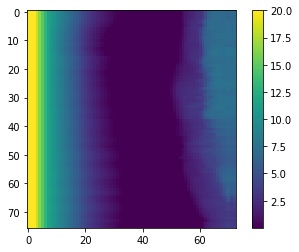

In [8]:
plt.imshow(data["hh"][:,:])
plt.colorbar()

In [9]:
data['zb']

array([[-18.       , -18.       , -18.       , ...,  -4.4594769,
         -4.7355161,  -4.7355161],
       [-18.       , -18.       , -18.       , ...,  -4.4594769,
         -4.7355161,  -4.7355161],
       [-18.       , -18.       , -18.       , ...,  -4.4594769,
         -4.7355161,  -4.7355161],
       ..., 
       [-18.       , -18.       , -18.       , ...,  -1.2843433,
         -1.1597608,  -1.1597608],
       [-18.       , -18.       , -18.       , ...,  -1.664071 ,
         -1.5320816,  -1.5320816],
       [-18.       , -18.       , -18.       , ...,  -1.664071 ,
         -1.5320816,  -1.5320816]])

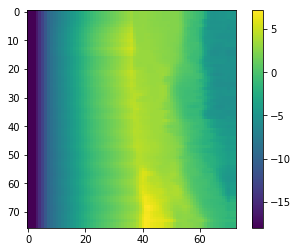

In [10]:
plt.imshow(data["zb"][:,:])
plt.colorbar()

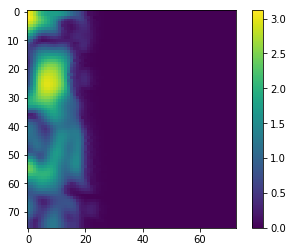

In [23]:
plt.imshow(data["H"][:,:])
plt.colorbar()

In [12]:
x = np.zeros(20) + 3
y = np.linspace(5, 70, num=20)
xy = np.c_[x, y]
xy_idx = np.round(xy).astype('int')
H = data["H"][:,:]
h = H[xy_idx[:,1], xy_idx[:,0]]


In [13]:
segments = []
for i in range(19):
    segments.append([xy[i], xy[i+1]])
h_segments = (h[:-1] + h[1:])/2.0  


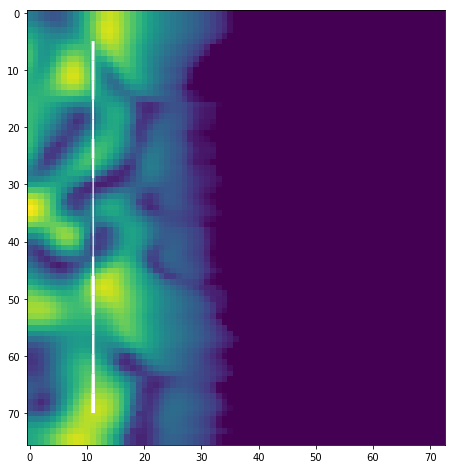

In [31]:
fig, ax = plt.subplots(figsize=(13, 8))
im = ax.imshow(data["H"][:,:])
line = matplotlib.collections.LineCollection(segments, linewidths=h_segments , colors='white')
ax.add_collection(line)



In [29]:
cgx = xbeach.get_var('cgx')[0]
cgy = xbeach.get_var('cgy')[0]
data["cgx"] = cgx
data["cgy"] = cgy

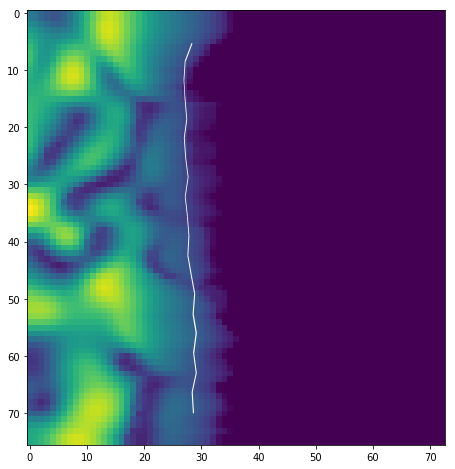

In [47]:
xy_idx = np.round(xy).astype('int')
cgx_i = data["cgx"][xy_idx[:, 1], xy_idx[:, 0]]
cgy_i = data["cgy"][xy_idx[:, 1], xy_idx[:, 0]]

scale = xbeach.get_time_step()
xy = xy + np.c_[cgx_i, cgy_i] * scale

xy_idx = np.round(xy).astype('int')
h = data["H"][xy_idx[:,1], xy_idx[:,0]]
h_segments = (h[:-1] + h[1:])/2.0  



segments = []
for i in range(19):
    segments.append([xy[i], xy[i+1]])
line.set_segments(segments)
line.set_linewidths(h_segments)
plt.draw()
fig